## **Covid_Detection using VGG19 architecture**





In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
from numpy import asarray
import argparse
import random
import tensorflow as tf
import pickle
import imutils
import cv2
import csv
import os
import gc
import keras

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255,rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Train',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

validation_generator=test_datagen.flow_from_directory('/content/gdrive/MyDrive/Test',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 4148 images belonging to 3 classes.
Found 1209 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=3,activation="softmax"))


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
model.load_weights('/content/gdrive/MyDrive/VGG16_cp/check_point_VGG.hdf5')

In [ ]:
filename = "/content/gdrive/MyDrive/VGG16_cp/logs_VGG.csv"

In [ ]:
H = model.fit(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch = len(train_generator),
                             initial_epoch=73,
                             epochs = 100,
                             validation_steps = len(validation_generator),
                             callbacks=[checkpoint,myCallback()])

Epoch 74/100
130/130 [==============================] - 1750s 13s/step - loss: 0.1374 - accuracy: 0.9505 - val_loss: 0.3103 - val_accuracy: 0.9032

Epoch 00074: saving model to /content/gdrive/MyDrive/VGG16_cp/check_point_VGG.hdf5
Epoch 75/100
130/130 [==============================] - 64s 491ms/step - loss: 0.1294 - accuracy: 0.9581 - val_loss: 0.3353 - val_accuracy: 0.8999

Epoch 00075: saving model to /content/gdrive/MyDrive/VGG16_cp/check_point_VGG.hdf5
Epoch 76/100
130/130 [==============================] - 64s 496ms/step - loss: 0.1040 - accuracy: 0.9602 - val_loss: 0.2391 - val_accuracy: 0.9214

Epoch 00076: saving model to /content/gdrive/MyDrive/VGG16_cp/check_point_VGG.hdf5
Epoch 77/100
130/130 [==============================] - 64s 491ms/step - loss: 0.1093 - accuracy: 0.9558 - val_loss: 0.2626 - val_accuracy: 0.9123

Epoch 00077: saving model to /content/gdrive/MyDrive/VGG16_cp/check_point_VGG.hdf5
Epoch 78/100
130/130 [==============================] - 64s 495ms/step - los

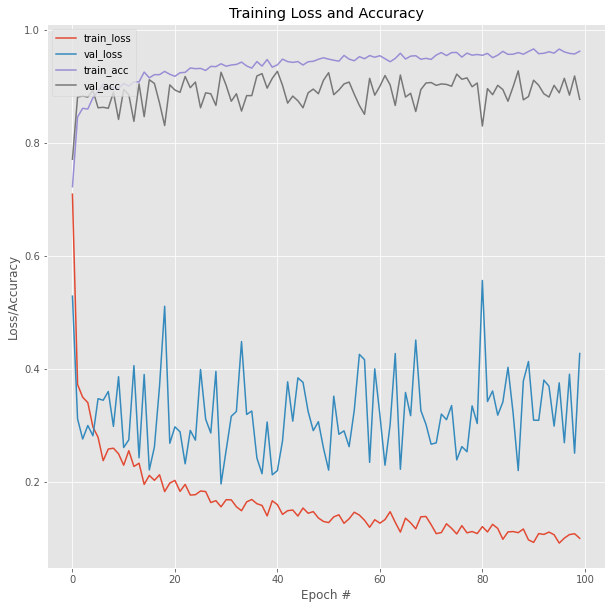

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
N = 100
plt.plot(np.arange(0, N), df["loss"], label="train_loss")
plt.plot(np.arange(0, N), df["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), df["acc"], label="train_acc")
plt.plot(np.arange(0, N), df["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")


In [ ]:

model.save('/content/gdrive/MyDrive/VGG16_cp/model_VGG16.hdf5')

In [ ]:
# load the image
image = cv2.imread('/content/gdrive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-667.png')
output = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (224, 224))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


In [ ]:
modelp = load_model('/content/gdrive/MyDrive/VGG16_cp/model_VGG16.hdf5')

In [ ]:
# classify the input image
print("[INFO] classifying image...")
proba = modelp.predict(image)[0]
idx = np.argmax(proba)
arr=['Covid','Normal','Pneumonia']
label=arr[idx]

[INFO] classifying image...


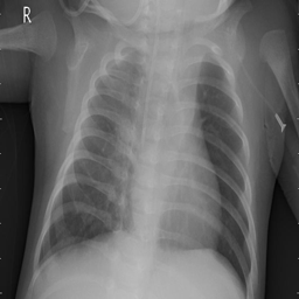

[INFO] Pneumonia: 99.87% 


In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(output)
label = "{}: {:.2f}% ".format(label, proba[idx] * 100)
output = imutils.resize(output, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
# show the output image
print("[INFO] {}".format(label))

In [ ]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
import os
from keras.preprocessing import image

for i in os.listdir("/content/gdrive/MyDrive/Test/COVID/"):
  img=image.load_img("/content/gdrive/MyDrive/Test/COVID/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  idx=np.argmax(modelp.predict(img)[0])
  print(idx)
  y_test.append(idx)
  y_actual.append(0)

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/Test/Normal/"):
  img=image.load_img("/content/gdrive/MyDrive/Test/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  idx=np.argmax(modelp.predict(img)[0])
  y_test.append(idx)
  y_actual.append(1)

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/Test/Viral Pneumonia/"):
  img=image.load_img("/content/gdrive/MyDrive/Test/Viral Pneumonia/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  idx=np.argmax(modelp.predict(img)[0])
  y_test.append(idx)
  y_actual.append(2)